In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Reading the data set into memory
df = pd.read_csv('./cv_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


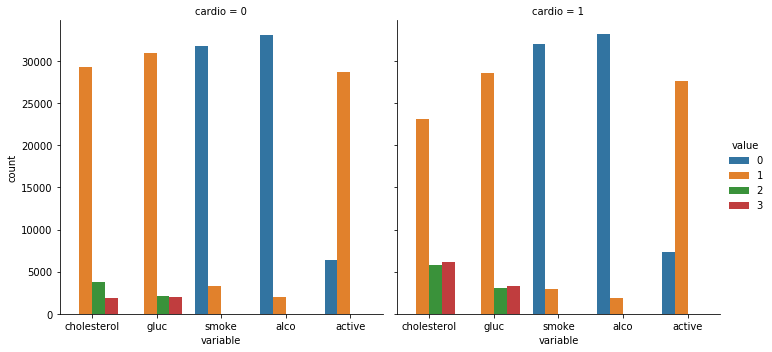

In [4]:
# Comparison chart of cholesterol, glucose, smoking, alcohol consumption, and activity across cardiovascular disease
# Left is negative for CV disease, on the right it is positive
comparison_charts = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=comparison_charts, kind="count");

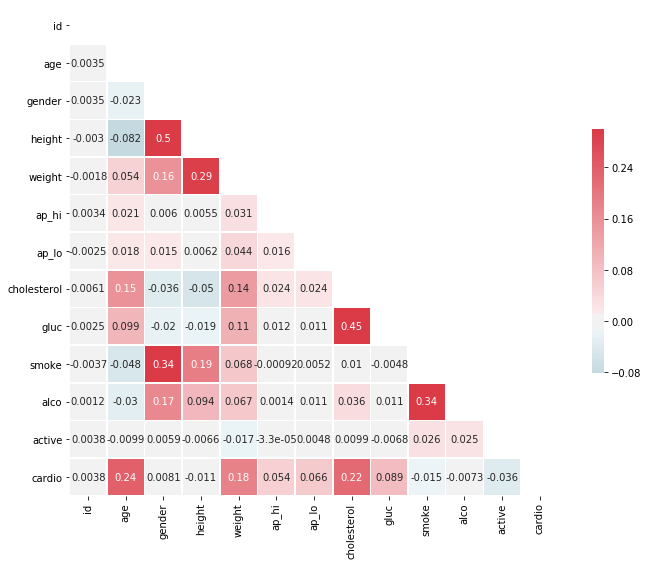

In [5]:
# Generate correlation table and heatmap
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure size
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, 
        cbar_kws={"shrink": .25});

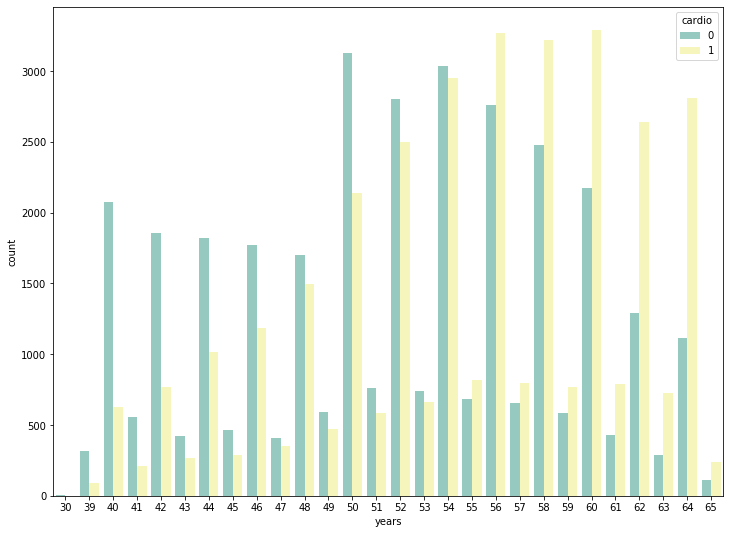

In [6]:
# Calculate how many years old someone is and then see relation to cardiovascular disease
rcParams['figure.figsize'] = 12, 9
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set3");

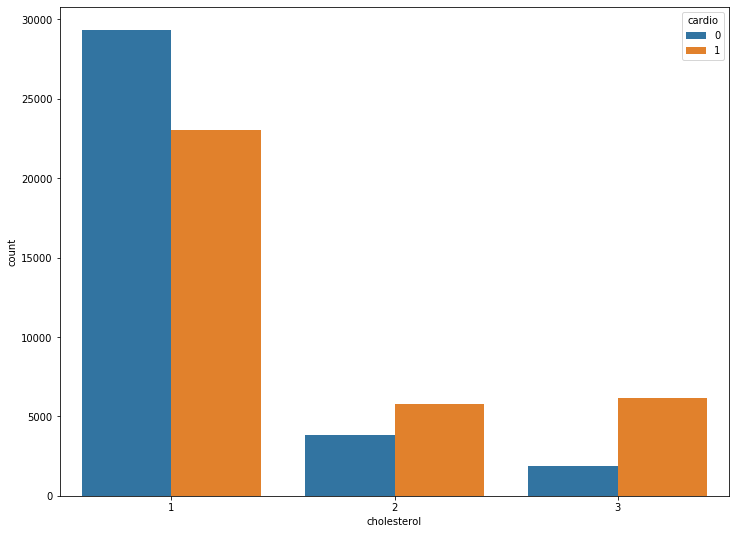

In [7]:
# Plot for cholesterol in relation to cardiovascular disease. Strong positive correlation
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.show()

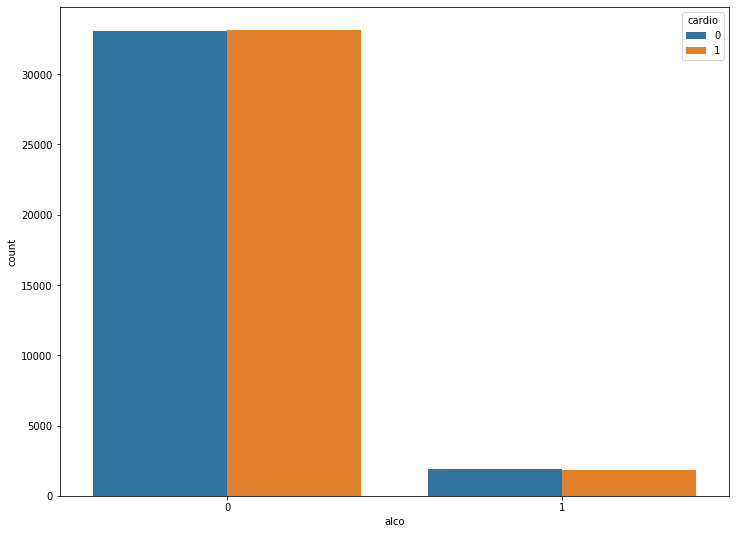

In [8]:
# Plot to see if any correlation between alcohol use and cardiovascular disease
sns.countplot(x='alco', hue='cardio', data=df)
plt.show()

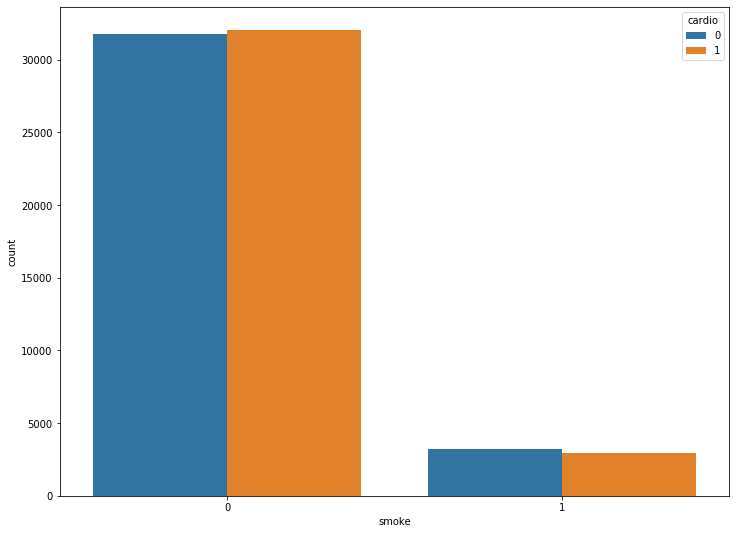

In [9]:
# Plot to see if any correlation between smoking and cardiovascular disease
sns.countplot(x='smoke', hue='cardio', data=df)
plt.show()

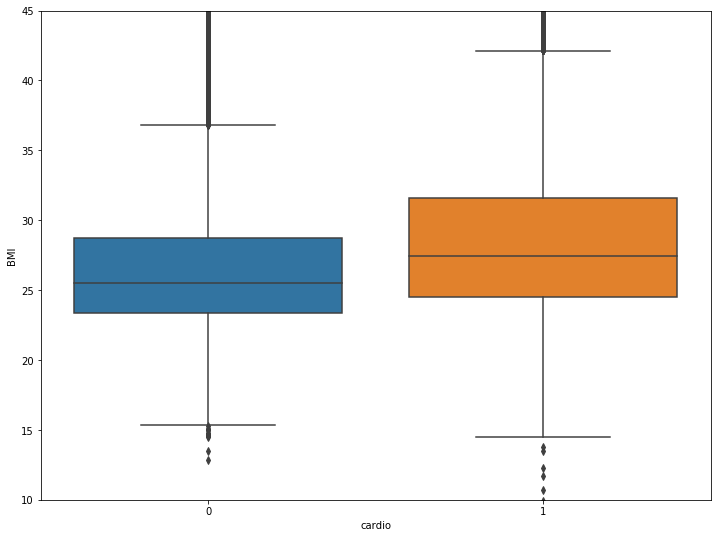

In [22]:
# Calculate Body Mass Index (BMI) and create boxplot to see relations to cardiovascular disease
df['BMI'] = df['weight'] / df['height'] / df['height'] * 10000
sns.boxplot(x='cardio', y='BMI', data=df)
plt.ylim(10, 45)
plt.show()

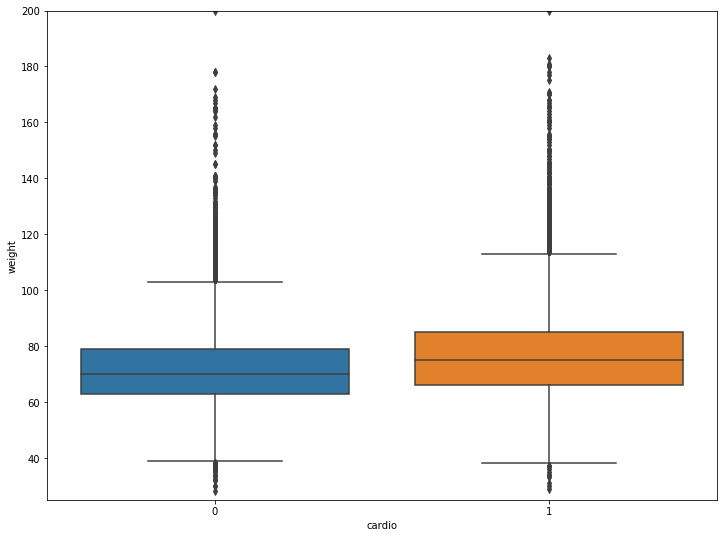

In [28]:
# Calculate average weight and then see relation to cardiovascular disease
#df.groupby('cardio')['weight'].mean()
sns.boxplot(x='cardio', y='weight', data=df)
plt.ylim(25, 200)
plt.show()